In [1]:
from google.colab import drive
drive.mount('/drive')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



Mounted at /drive


In [ ]:
# Suppose the Eagles and Cowboys repeatedly play each other


In [2]:
def nfl_elo_sim(R1, R2, K, N_games, random_seed=123):
  df = pd.DataFrame(columns=['Game','R_phi','R_dal','R_diff','win_prob_phi','win_prob_dal','game_outcome'])

  np.random.seed(random_seed)
  for i in range(N_games):
    # Compute Eagles Win Probability
    R_diff = R1-R2
    win_prob1 = 1/(1+10**(-R_diff/400))

    # Simulate a game outcome
    y1 = np.random.binomial(n=1, p=win_prob1, size=1)[0]

    # Collect new data for dataframe input
    new_data = pd.DataFrame({'Game':[i+1],
                           'R1':[R1],
                           'R2':[R2],
                           'R_diff':[R_diff],
                           'win_prob1':[win_prob1],
                           'win_prob2':[1-win_prob1],
                           'game_outcome':[y1]})

    df = pd.concat([df, new_data], axis=0, ignore_index=False)

    # Update Elo Ratings
    R1 = R1 + K*(y1-win_prob1)
    R2 = R2 + K*(1-y1-(1-win_prob1))

  return df



In [3]:
df5 = nfl_elo_sim(R1=1706, R2=1639, K=5, N_games=1000)
df20 = nfl_elo_sim(R1=1706, R2=1639, K=20, N_games=1000)

In [4]:
df5

,Game,R_phi,R_dal,R_diff,win_prob_phi,win_prob_dal,game_outcome,R1,R2,win_prob1,win_prob2
0,1,NaN,NaN,67,NaN,NaN,0,1706.000000,1639.000000,0.595243,0.404757
0,2,NaN,NaN,61.04757,NaN,NaN,1,1703.023785,1641.976215,0.586961,0.413039
0,3,NaN,NaN,65.177955,NaN,NaN,1,1705.088978,1639.911022,0.592714,0.407286
0,4,NaN,NaN,69.25082,NaN,NaN,1,1707.125410,1637.874590,0.598361,0.401639
0,5,NaN,NaN,73.267212,NaN,NaN,0,1709.133606,1635.866394,0.603904,0.396096
...,...,...,...,...,...,...,...,...,...,...,...
0,996,NaN,NaN,179.445527,NaN,NaN,1,1762.222763,1582.777237,0.737492,0.262508
0,997,NaN,NaN,182.070611,NaN,NaN,1,1763.535306,1581.464694,0.740407,0.259593
0,998,NaN,NaN,184.666546,NaN,NaN,1,1764.833273,1580.166727,0.743268,0.256732
0,999,NaN,NaN,187.233861,NaN,NaN,1,1766.116931,1578.883069,0.746078,0.253922


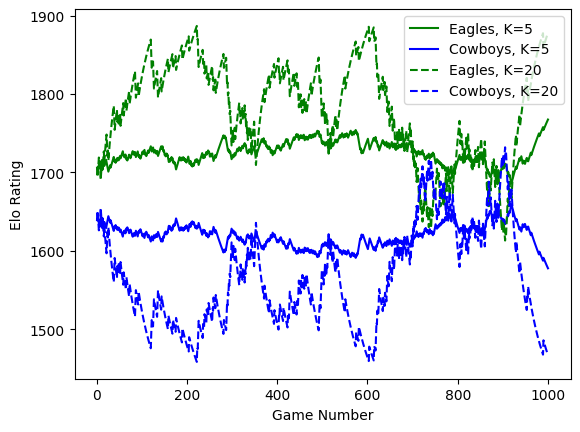

In [5]:
plt.plot(df5['Game'], df5['R1'], color='green', label='Eagles, K=5')
plt.plot(df5['Game'], df5['R2'], color='blue', label='Cowboys, K=5')
plt.plot(df20['Game'], df20['R1'], color='green', label='Eagles, K=20', linestyle='dashed')
plt.plot(df20['Game'], df20['R2'], color='blue', label='Cowboys, K=20', linestyle='dashed')
plt.xlabel('Game Number')
plt.ylabel('Elo Rating')
plt.legend(loc='upper right')

In [ ]:
df5 = nfl_elo_sim(R1=1706, R2=1706, K=5, N_games=1000)
df20 = nfl_elo_sim(R1=1706, R2=1706, K=20, N_games=1000)

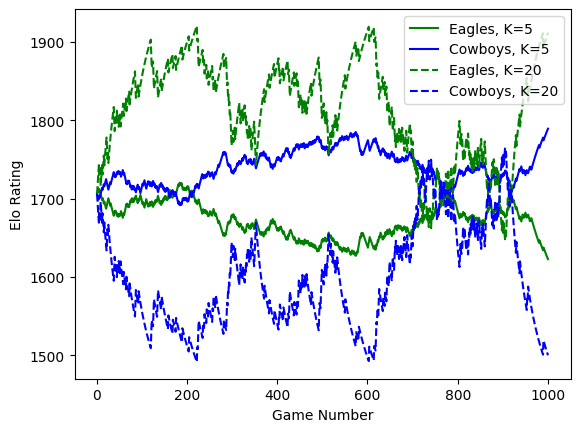

In [ ]:
plt.plot(df5['Game'], df5['R1'], color='green', label='Eagles, K=5')
plt.plot(df5['Game'], df5['R2'], color='blue', label='Cowboys, K=5')
plt.plot(df20['Game'], df20['R1'], color='green', label='Eagles, K=20', linestyle='dashed')
plt.plot(df20['Game'], df20['R2'], color='blue', label='Cowboys, K=20', linestyle='dashed')
plt.xlabel('Game Number')
plt.ylabel('Elo Rating')
plt.legend(loc='upper right')

## How do we determine K?
- We can use cross-validation to test a number of values for K and select the one that maximizes our log-likelihood.

In [6]:
years_to_pull = np.arange(2016,2020)
nfl_dict = {}
#for i in years_to_pull:
#  url = f"https://www.pro-football-reference.com/years/{i}/games.htm"
#  nfl_dict[f'{i}'] = pd.read_html(url)[0]


In [ ]:
# Write this data to MyDrive
#nfl_dict['2016'].to_csv('../drive/MyDrive/data/NFL_season_2016.csv')
#nfl_dict['2017'].to_csv('../drive/MyDrive/data/NFL_season_2017.csv')
#nfl_dict['2018'].to_csv('../drive/MyDrive/data/NFL_season_2018.csv')
#nfl_dict['2019'].to_csv('../drive/MyDrive/data/NFL_season_2019.csv')

In [7]:
for i in years_to_pull:
  nfl_dict[f"{i}"] = pd.read_csv(f'../drive/MyDrive/data/Football/NFL_season_{i}.csv')

In [9]:
nfl_dict.keys()

dict_keys(['2016', '2017', '2018', '2019'])

In [11]:
nfl_dict['2018']

,Unnamed: 0,Week,Day,Date,Time,Winner/tie,Unnamed: 5,Loser/tie,Unnamed: 7,PtsW,PtsL,YdsW,TOW,YdsL,TOL
0,0,1,Thu,2018-09-06,8:20PM,Philadelphia Eagles,NaN,Atlanta Falcons,boxscore,18,12,232,2,299,1
1,1,1,Sun,2018-09-09,1:00PM,Baltimore Ravens,NaN,Buffalo Bills,boxscore,47,3,369,1,153,2
2,2,1,Sun,2018-09-09,1:00PM,Cincinnati Bengals,@,Indianapolis Colts,boxscore,34,23,330,2,380,2
3,3,1,Sun,2018-09-09,1:00PM,Pittsburgh Steelers,@,Cleveland Browns,boxscore,21,21,472,6,327,1
4,4,1,Sun,2018-09-09,1:00PM,New England Patriots,NaN,Houston Texans,boxscore,27,20,389,3,325,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278,279,Division,Sun,2019-01-13,1:05PM,New England Patriots,NaN,Los Angeles Chargers,boxscore,41,28,498,0,335,2
279,280,Division,Sun,2019-01-13,4:40PM,New Orleans Saints,NaN,Philadelphia Eagles,boxscore,20,14,420,1,250,2
280,281,ConfChamp,Sun,2019-01-20,3:05PM,Los Angeles Rams,@,New Orleans Saints,boxscore,26,23,378,1,290,1
281,282,ConfChamp,Sun,2019-01-20,6:40PM,New England Patriots,@,Kansas City Chiefs,boxscore,37,31,524,2,290,0


In [8]:
nfl_dict['2019'][nfl_dict['2019']['Winner/tie'].isna()]

,Unnamed: 0,Week,Day,Date,Time,Winner/tie,Unnamed: 5,Loser/tie,Unnamed: 7,PtsW,PtsL,YdsW,TOW,YdsL,TOL
272,272,NaN,NaN,Playoffs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
def data_processing(df_dict, season_list):

  # Remove rows without data and add season column
  for season in season_list:
    df_dict[str(season)] = df_dict[str(season)][~df_dict[str(season)]['Winner/tie'].isna()]
    df_dict[str(season)]['Season'] = season

  # Concatenate all seasons together
  df = pd.concat(df_dict.values(), ignore_index=True)

  # Remove non-regular season weeks
  df = df[df['Week'].str.isnumeric()]

  # Convert 'Week' from string to integer
  df['Week'] = df['Week'].astype('int')

  #nfl = nfl.reset_index()
  # For simplicity, assume San Diego Chargers and Los Angeles Chargers are the same team
  df['Winner/tie'] = df['Winner/tie'].replace('San Diego Chargers', 'Los Angeles Chargers')
  df['Loser/tie'] = df['Loser/tie'].replace('San Diego Chargers', 'Los Angeles Chargers')

  # Create 'relative_week' for Elo Rating purposes (FYI: this is bad code, but good enough for now...)
  max_week_2016 = df[df['Season']==2016]['Week'].max()
  max_week_2017 = df[df['Season']==2017]['Week'].max()
  max_week_2018 = df[df['Season']==2018]['Week'].max()
  df['relative_week'] = np.where(df['Season']==2017,
                                 df['Week']+max_week_2016,
                                 np.where(df['Season']==2018,
                                          df['Week']+max_week_2016+max_week_2017,
                                          np.where(df['Season']==2019,
                                                   df['Week']+max_week_2016+max_week_2017+max_week_2018,
                                                   df['Week'])))


  return df


In [13]:
nfl=data_processing(df_dict=nfl_dict, season_list=[2016,2017,2018, 2019])

In [ ]:
nfl[nfl['Season']==2016]['Week'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17])

In [14]:
nfl.head(2)

,Unnamed: 0,Week,Day,Date,Time,Winner/tie,Unnamed: 5,Loser/tie,Unnamed: 7,PtsW,PtsL,YdsW,TOW,YdsL,TOL,Season,relative_week
0,0,1,Thu,2016-09-08,8:40PM,Denver Broncos,NaN,Carolina Panthers,boxscore,21,20,307,3,333,1,2016,1
1,1,1,Sun,2016-09-11,1:04PM,Baltimore Ravens,NaN,Buffalo Bills,boxscore,13,7,308,1,160,0,2016,1


In [15]:
nfl.tail(2)

,Unnamed: 0,Week,Day,Date,Time,Winner/tie,Unnamed: 5,Loser/tie,Unnamed: 7,PtsW,PtsL,YdsW,TOW,YdsL,TOL,Season,relative_week
1119,270,17,Sun,2019-12-29,4:25PM,Baltimore Ravens,NaN,Pittsburgh Steelers,boxscore,28,10,304,2,168,2,2019,68
1120,271,17,Sun,2019-12-29,8:20PM,San Francisco 49ers,@,Seattle Seahawks,boxscore,26,21,398,0,348,0,2019,68


In [ ]:
nfl[nfl['Season']==2016]['Week'].max(), nfl[nfl['Season']==2017]['Week'].max(), nfl[nfl['Season']==2018]['Week'].max(), nfl[nfl['Season']==2019]['Week'].max()

(17, 17, 17, 17)

In [ ]:
nfl['Season'].value_counts()

2016    256
2017    256
2018    256
2019    256
Name: Season, dtype: int64

In [ ]:
nfl.isna().sum()

Unnamed: 0         0
Week               0
Day                0
Date               0
Time               0
Winner/tie         0
Unnamed: 5       577
Loser/tie          0
Unnamed: 7         0
PtsW               0
PtsL               0
YdsW               0
TOW                0
YdsL               0
TOL                0
Season             0
relative_week      0
dtype: int64

We have 3 seasons of data.
- Regular Seasons 2016 and 2017 will be used for training
- Regular Season 2018 will be used for validation for K
- Regular Season 2019 will be used for test set evaluation

In [16]:
def EloK(df, K, init_elo):

  # Initialize Elo Ratings Matrix
  teams = set(df['Winner/tie']).union(set(df['Loser/tie']))
  elo_mat = np.zeros((df['relative_week'].max()+1, len(teams)))
  df_elo = pd.DataFrame(elo_mat)
  df_elo.columns = teams
  df_elo.columns = df_elo.columns.sort_values()
  df_elo.iloc[0,:] = init_elo

  for i in range(1, df['relative_week'].max()+1):

    # Subset for the week of interest
    df_week = df[df['relative_week']==i]

    # Find teams with bye weeks
    week_teams = set(df_week['Winner/tie']).union(set(df_week['Loser/tie']))
    bye_teams = list(set(df_elo.columns)-week_teams)

    # Iterate through matches within the week of interest
    for j in range(len(df_week)):

      # Identify which teams are playing for a given match
      Team1 = df_week['Winner/tie'].iloc[j]
      Team2 = df_week['Loser/tie'].iloc[j]

      # Compute the difference in Elo Ratings prior to this match
      R_diff = df_elo.loc[i-1, Team1] - df_elo.loc[i-1, Team2]

      # Compute the probability that Team1 wins
      win_prob_team1 = 1/(1+10**(-R_diff/400))

      # Update the Elo Rating dataframe (making sure to account for teams with bye weeks)
      for team in bye_teams:
        df_elo.loc[i, team] = df_elo.loc[i-1, team] # Teams with byes should have the same Elo rating as the prevous week
      df_elo.loc[i, Team1] = df_elo.loc[i-1, Team1] + K*(1-win_prob_team1) # note: Team1 always wins (as the data is set up)
      df_elo.loc[i, Team2] = df_elo.loc[i-1, Team2] + K*(0-(1-win_prob_team1)) # note: Team2 always loses (as the data is set up)

  return df_elo


In [17]:
df_k_20 = EloK(df=nfl, K=20, init_elo=1500)
df_k_20.shape

(69, 32)

- The first row (index 0) are all the initial Elo Ratings for each team (1500)
- Then the second row (index 1) through the 69th row (index 68) are the Elo updates for each week of the four NFL seasons
- We will use 2018 data to find the optimal k

In [18]:
df_k_20.head()

,Arizona Cardinals,Atlanta Falcons,Baltimore Ravens,Buffalo Bills,Carolina Panthers,Chicago Bears,Cincinnati Bengals,Cleveland Browns,Dallas Cowboys,Denver Broncos,...,New York Giants,New York Jets,Oakland Raiders,Philadelphia Eagles,Pittsburgh Steelers,San Francisco 49ers,Seattle Seahawks,Tampa Bay Buccaneers,Tennessee Titans,Washington Redskins
0,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,...,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
1,1490.000000,1490.000000,1510.000000,1490.000000,1490.000000,1490.000000,1510.000000,1490.000000,1490.000000,1510.000000,...,1510.000000,1490.000000,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1490.000000,1490.000000
2,1500.575011,1500.575011,1519.424989,1480.000000,1500.575011,1480.575011,1500.000000,1480.575011,1500.000000,1519.424989,...,1519.424989,1500.000000,1499.424989,1519.424989,1520.000000,1499.424989,1499.424989,1499.424989,1500.575011,1480.000000
3,1489.983506,1510.000000,1528.295092,1490.591505,1491.133526,1471.133526,1490.558514,1470.575011,1509.441486,1528.866474,...,1508.295092,1490.000000,1509.458089,1529.441539,1509.983450,1489.424989,1509.424989,1489.458089,1490.541911,1491.129897
4,1480.574535,1519.457512,1517.753450,1501.705062,1481.676013,1481.659985,1500.558989,1461.165939,1518.866001,1537.737049,...,1498.902984,1480.558514,1519.999731,1529.441539,1519.983926,1480.000473,1518.866474,1480.587514,1481.100900,1500.538969


In [19]:
df_k_20.tail()

,Arizona Cardinals,Atlanta Falcons,Baltimore Ravens,Buffalo Bills,Carolina Panthers,Chicago Bears,Cincinnati Bengals,Cleveland Browns,Dallas Cowboys,Denver Broncos,...,New York Giants,New York Jets,Oakland Raiders,Philadelphia Eagles,Pittsburgh Steelers,San Francisco 49ers,Seattle Seahawks,Tampa Bay Buccaneers,Tennessee Titans,Washington Redskins
64,1382.048464,1482.216538,1605.350820,1522.085398,1479.018148,1505.241148,1369.044601,1385.719592,1560.206769,1424.070594,...,1375.535777,1374.263839,1459.030628,1536.602187,1589.170578,1479.020177,1615.775556,1436.681309,1533.177663,1434.719889
65,1377.391474,1492.124484,1612.999101,1514.437117,1469.110202,1516.810118,1359.524178,1395.240015,1548.637799,1437.484723,...,1369.865804,1385.940961,1451.132931,1542.272160,1593.827568,1493.570108,1604.414542,1448.347885,1541.075359,1427.341815
66,1387.904745,1502.166092,1617.258713,1526.683201,1462.818952,1507.343835,1356.441894,1384.726744,1559.525321,1432.375215,...,1381.338622,1381.681349,1439.765683,1549.079800,1581.581484,1483.528500,1610.705793,1458.238084,1530.878537,1420.534174
67,1403.562401,1509.700424,1621.413647,1520.302408,1453.243225,1500.693796,1347.969604,1380.571810,1549.224766,1442.440475,...,1392.461999,1396.874188,1451.615425,1559.380356,1566.388644,1495.931093,1595.048136,1450.669297,1523.944692,1409.410797
68,1397.694805,1518.017534,1629.843011,1506.892132,1448.324594,1513.116853,1358.905227,1369.636188,1555.404615,1452.704490,...,1386.927875,1410.284465,1441.351410,1564.914480,1557.959281,1508.708957,1582.270272,1442.352187,1534.750489,1403.230948


Text(0.5, 1.0, 'K=20')

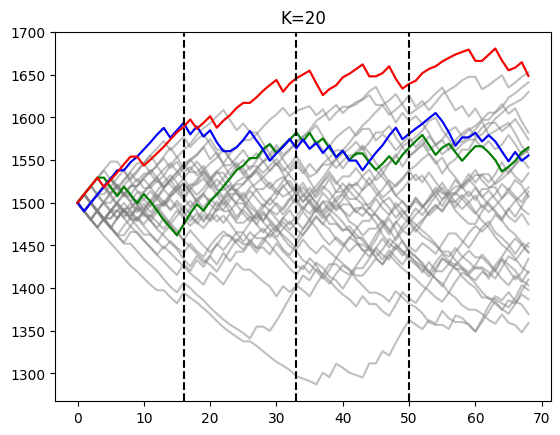

In [20]:
df_elo = df_k_20
for team in df_elo.columns:
  plt.plot(df_elo[team], color='gray', alpha=.5)
plt.plot(df_elo['Philadelphia Eagles'], color='green')
plt.plot(df_elo['Dallas Cowboys'], color='blue')
plt.plot(df_elo['New England Patriots'], color='red')
plt.axvline(x=16, color="black", linestyle='dashed')
plt.axvline(x=33, color="black", linestyle='dashed')
plt.axvline(x=50, color="black", linestyle='dashed')
plt.title('K=20')

In [21]:
def FindOptimalK(df, K_list, season, init_elo):

  # Subset NFL data for season to be used as validation set
  df_val = df.copy()
  df_val = df_val[df_val['Season']==season]
  relative_week1_val = df_val['relative_week'].min()
  relative_week_final_val = df_val['relative_week'].max()
  df_val['home_team'] = np.where(df_val['Unnamed: 5']=='@',df_val['Loser/tie'], df_val['Winner/tie'])
  df_val['away_team'] = np.where(df_val['Unnamed: 5']=='@', df_val['Winner/tie'], df_val['Loser/tie'])

  # Initialize dataframe to record values of K and proportion correctly predicted and loglikelihood
  df_K_acc = pd.DataFrame()
  df_K_loglik = pd.DataFrame()
  df_K_brier_score = pd.DataFrame()
  df_K_baseline = pd.DataFrame()
  elo_dict = {}

  # Iterate over K-factor values
  for K in K_list:

    # Run Elo System for a given value of K and initial Elo rating value
    df_elo = EloK(df=df, K=K, init_elo=init_elo)
    elo_dict[f'K_{int(K)}'] = df_elo

    # Initialize list for recording accuracy of predictions and loglikelihoods
    team1_win = []
    loglik = []
    brier_score = []
    baseline = []
    teamh_win = [] # for calculating baseline accuracy

    # Iterate on rows of validation season
    for i in range(relative_week1_val, relative_week_final_val+1):

      # Subset match data for relative week i, extract Elo ratings prior to current week's games
      df_val_week = df_val[df_val['relative_week']==i]
      df_elo_week = df_elo.iloc[i-1,:]

      # Iterate on rows of weekly subset
      for j in range(len(df_val_week)):

        # Actual Team Results
        Team1 = df_val_week['Winner/tie'].iloc[j] # Winner of Match
        Team2 = df_val_week['Loser/tie'].iloc[j] # Loser of Match
        TeamH = df_val_week['home_team'].iloc[j] # Home Team of Match
        TeamA = df_val_week['away_team'].iloc[j] # Away Team of Match
        TeamH_Win = np.where(TeamH==Team1, 1, 0) # Convert to Binary

        # Elo Ratings for each team
        elo1 = df_elo_week[Team1]
        elo2 = df_elo_week[Team2]
        eloH = df_elo_week[TeamH]
        eloA = df_elo_week[TeamA]

        # Win Probabilities and Log-Likelihood and Brier Score
        Rdiff = eloH-eloA
        TeamH_WinProb = 1/(1+10**(-Rdiff/400))
        loglik_gm = TeamH_Win*np.log(TeamH_WinProb)+(1-TeamH_Win)*np.log(1-TeamH_WinProb)
        loglik.append(loglik_gm)
        brier_score_gm = (TeamH_Win-TeamH_WinProb)**2
        brier_score.append(brier_score_gm)
        baseline_gm = (TeamH_Win-1)**2
        baseline.append(baseline_gm)
        teamh_win.append(TeamH_Win)

        # Make prediction based on higher Elo Rating
        # If Team1's Elo rating is higher than Team2's Elo rating, then this is a correct prediction
        # Assuming ties go to winner for simplicity
        if elo1 >= elo2:
          team1_win.append(1) # accurate prediction
        else:
          team1_win.append(0) # wrong prediction

    # Record predictions
    df_K_acc[f"K_{K}"] = team1_win
    df_K_loglik[f"K_{K}"] = loglik
    df_K_brier_score[f"K_{K}"] = brier_score
    df_K_baseline[f"K_{K}"] = baseline
    print(f"Baseline Accuracy: {np.mean(teamh_win)}")

  # Output accuracy for each K
  df_acc = pd.DataFrame(df_K_acc.mean(axis=0)).reset_index().rename(columns={'index':'K',0:'Accuracy'})
  print(df_acc)
  df_loglik = pd.DataFrame(df_K_loglik.sum(axis=0)).reset_index().rename(columns={'index':'K',0:'Log_Likelihood'})
  print(df_loglik)
  df_brier_score = pd.DataFrame(df_K_brier_score.mean(axis=0)).reset_index().rename(columns={'index':'K',0:'Brier_Score'})
  print(df_brier_score)
  df_baseline = pd.DataFrame(df_K_baseline.mean(axis=0)).reset_index().rename(columns={'index':'K', 0:'Baseline_Brier_Score'})
  print(df_baseline)

  return df_K_acc, df_K_loglik, df_K_brier_score, elo_dict



In [22]:
df_K_acc, df_K_loglik, df_K_brier_score, elo_dict = FindOptimalK(df=nfl, K_list=np.linspace(5,200,40), season=2018, init_elo=1500)

Baseline Accuracy: 0.59765625
Baseline Accuracy: 0.59765625
Baseline Accuracy: 0.59765625
Baseline Accuracy: 0.59765625
Baseline Accuracy: 0.59765625
Baseline Accuracy: 0.59765625
Baseline Accuracy: 0.59765625
Baseline Accuracy: 0.59765625
Baseline Accuracy: 0.59765625
Baseline Accuracy: 0.59765625
Baseline Accuracy: 0.59765625
Baseline Accuracy: 0.59765625
Baseline Accuracy: 0.59765625
Baseline Accuracy: 0.59765625
Baseline Accuracy: 0.59765625
Baseline Accuracy: 0.59765625
Baseline Accuracy: 0.59765625
Baseline Accuracy: 0.59765625
Baseline Accuracy: 0.59765625
Baseline Accuracy: 0.59765625
Baseline Accuracy: 0.59765625
Baseline Accuracy: 0.59765625
Baseline Accuracy: 0.59765625
Baseline Accuracy: 0.59765625
Baseline Accuracy: 0.59765625
Baseline Accuracy: 0.59765625
Baseline Accuracy: 0.59765625
Baseline Accuracy: 0.59765625
Baseline Accuracy: 0.59765625
Baseline Accuracy: 0.59765625
Baseline Accuracy: 0.59765625
Baseline Accuracy: 0.59765625
Baseline Accuracy: 0.59765625
Baseline A

In [23]:
df_acc = df_K_acc.mean(axis=0)
df_acc.idxmax()
df_acc.argmax()

np.int64(27)

In [24]:
df_loglik = df_K_loglik.sum(axis=0)
df_loglik.idxmax()

'K_20.0'

In [25]:
df_acc.mean(axis=0)

np.float64(0.59775390625)

In [26]:
df_bs = df_K_brier_score.mean(axis=0)
df_bs.idxmin()
df_bs.argmin()

np.int64(3)

Text(0, 0.5, 'Validation Prediction Accuracy')

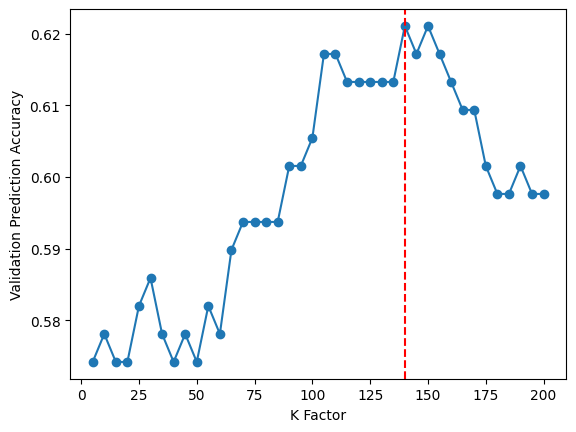

In [27]:
K = np.linspace(5,200,40)
plt.plot(K, df_acc)
plt.scatter(K, df_acc)
plt.axvline(x=K[df_acc.argmax()], color='red',linestyle='dashed')
plt.xlabel('K Factor')
plt.ylabel('Validation Prediction Accuracy')

Text(0, 0.5, 'Validation Prediction Log-Likelihood')

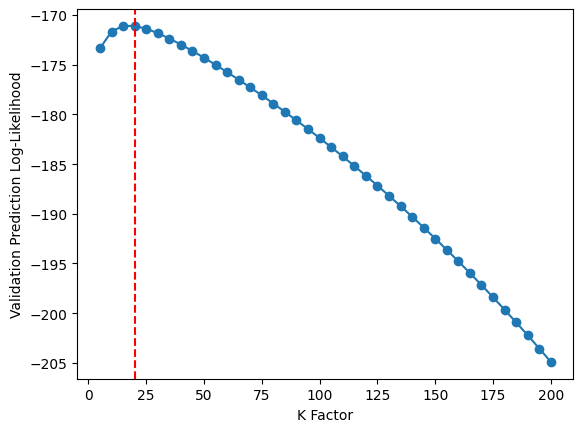

In [28]:
K = np.linspace(5,200,40)
plt.plot(K, df_loglik)
plt.scatter(K, df_loglik)
plt.axvline(x=K[df_loglik.argmax()], color='red',linestyle='dashed')
plt.xlabel('K Factor')
plt.ylabel('Validation Prediction Log-Likelihood')

Text(0, 0.5, 'Validation Prediction Brier Score')

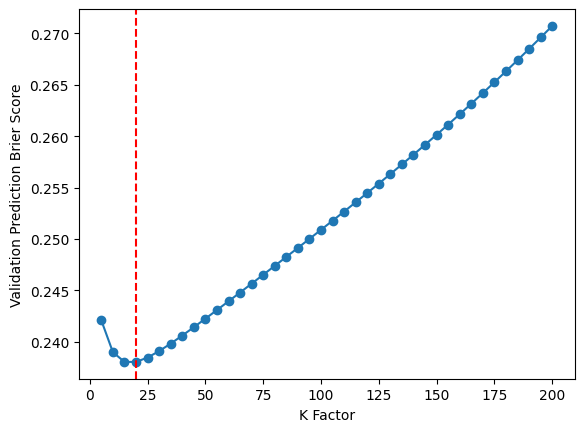

In [29]:
K = np.linspace(5,200,40)
plt.plot(K, df_bs)
plt.scatter(K, df_bs)
plt.axvline(x=K[df_bs.argmin()], color='red',linestyle='dashed')
plt.xlabel('K Factor')
plt.ylabel('Validation Prediction Brier Score')

Text(0.5, 1.0, 'K=20')

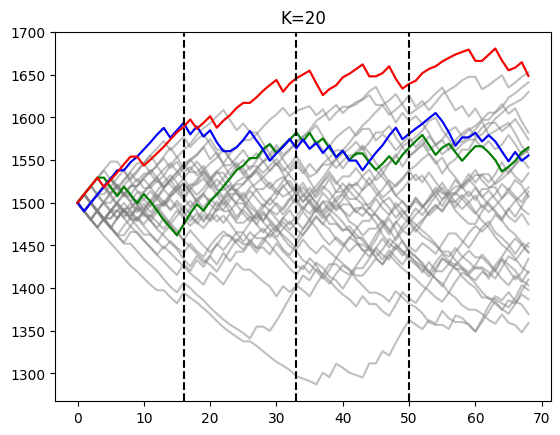

In [30]:
df_elo = elo_dict['K_20']
for team in df_elo.columns:
  plt.plot(df_elo[team], color='gray', alpha=.5)
plt.plot(df_elo['Philadelphia Eagles'], color='green')
plt.plot(df_elo['Dallas Cowboys'], color='blue')
plt.plot(df_elo['New England Patriots'], color='red')
plt.axvline(x=16, color="black", linestyle='dashed')
plt.axvline(x=33, color="black", linestyle='dashed')
plt.axvline(x=50, color="black", linestyle='dashed')
plt.title('K=20')

In [ ]:
df_ranks = df_elo.tail(1).T.sort_values(68, ascending=False).rename(columns={68:'Elo Rating'})
df_ranks['Rank'] = np.arange(1,33)
df_ranks.loc[['New England Patriots','Philadelphia Eagles','Dallas Cowboys']]

,Elo Rating,Rank
New England Patriots,1648.673795,2
Philadelphia Eagles,1564.914480,7
Dallas Cowboys,1555.404615,11


Text(0.5, 1.0, 'K=140')

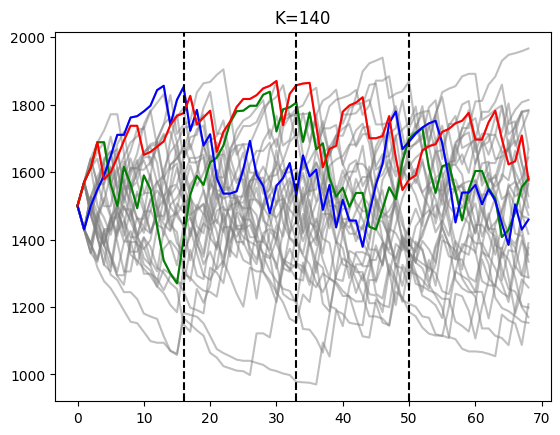

In [31]:
df_elo = elo_dict['K_140']
for team in df_elo.columns:
  plt.plot(df_elo[team], color='gray', alpha=.5)
plt.plot(df_elo['Philadelphia Eagles'], color='green')
plt.plot(df_elo['Dallas Cowboys'], color='blue')
plt.plot(df_elo['New England Patriots'], color='red')
plt.axvline(x=16, color="black", linestyle='dashed')
plt.axvline(x=33, color="black", linestyle='dashed')
plt.axvline(x=50, color="black", linestyle='dashed')
plt.title('K=140')

In [ ]:
df_ranks = df_elo.tail(1).T.sort_values(68, ascending=False).rename(columns={68:'Elo Rating'})
df_ranks['Rank'] = np.arange(1,33)
df_ranks.loc[['New England Patriots','Philadelphia Eagles','Dallas Cowboys']]

,Elo Rating,Rank
New England Patriots,1577.532903,12
Philadelphia Eagles,1579.790669,11
Dallas Cowboys,1458.898433,20


In [ ]:
df_K_acc, df_K_loglik, elo_dict = FindOptimalK(df=nfl, K_list=[20,140], season=2019, init_elo=1500)

       K  Accuracy
0   K_20  0.593750
1  K_140  0.632812
       K  Log_Likelihood
0   K_20     -165.175166
1  K_140     -175.220752


In [ ]:
nfl['Unnamed: 5'].value_counts()

@    447
Name: Unnamed: 5, dtype: int64